<a href="https://colab.research.google.com/github/evanreppeto/AIProject/blob/main/Copy_of_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imghdr
import cv2
from tensorflow. keras.layers import Dense, Flatten, Activation, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow. keras.models import Sequential
from tensorflow. keras.models import load_model
from tensorflow. keras.optimizers import Adam, SGD

<ipython-input-1-a582af57eb5d>:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/AI Project Data')
data_iterator = Data.as_numpy_iterator()
batch = data_iterator.next()

Found 3723 files belonging to 8 classes.


In [10]:
#normalizing orparation
Data = Data.map(lambda x,y: (x/255, y))

#split the data set(75:15:10)
train_size = int(len(Data)*.75)
val_size = int(len(Data)*.15)
test_size = int(len(Data)*.1)

train = Data.take(train_size)
val = Data.skip(train_size).take(val_size)
test = Data.skip(train_size+val_size).take(test_size)

In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))

# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     zoom_range=0.15,
#     horizontal_flip=True
# )

model = Sequential([
base_model,
GlobalAveragePooling2D(),
Dense(258, activation='relu'),
Dense(256, activation='relu'),
Dense(8, activation='softmax')

])
opt = SGD(learning_rate=0.001, momentum = 0.9)
model.compile(optimizer=opt, loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 258)            │       132,354 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        66,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,915,402 (56.90 MB)

 Trainable params: 14,915,402 (56.90 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
import datetime
import tensorflow as tf

logdir = 'Logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

total_epochs = 25
save_interval = 5

for epoch in range(0, total_epochs, save_interval):
    print("Training epochs " + str(epoch + 1) + " to " + str(epoch + save_interval) + "...")

    # Train in blocks of 10 epochs
    hist = model.fit(
        train,
        initial_epoch=epoch,
        epochs=epoch + save_interval,
        validation_data=val,
        callbacks=[tensorboard_callback]
    )

    # Save the model after every 10 epochs
    date_stamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    file_name = "/content/drive/MyDrive/New Data/model_epoch" + str(epoch + save_interval) + "_" + date_stamp + ".h5"
    model.save(file_name)
    print("Model saved at epoch " + str(epoch + save_interval) + ": " + file_name)






Training epochs 1 to 5...
Epoch 1/5


KeyboardInterrupt: 

In [14]:
full_loss = []
full_val_loss = []
full_acc = []
full_val_acc = []

for epoch in range(0, total_epochs, save_interval):
    print(f"Training epochs {epoch + 1} to {epoch + save_interval}...")

    hist = model.fit(
        train,
        initial_epoch=epoch,
        epochs=epoch + save_interval,
        validation_data=val,
        callbacks=[tensorboard_callback]
    )

    # Save history metrics
    full_loss.extend(hist.history['loss'])
    full_val_loss.extend(hist.history['val_loss'])
    full_acc.extend(hist.history['accuracy'])
    full_val_acc.extend(hist.history['val_accuracy'])

    # Save model
    date_stamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    file_name = f"/content/drive/MyDrive/New Data/model_epoch{epoch + save_interval}_{date_stamp}.h5"
    model.save(file_name)
    print(f"Model saved at epoch {epoch + save_interval}: {file_name}")

Training epochs 1 to 5...
Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.2266 - loss: 1.9381 - val_accuracy: 0.2647 - val_loss: 1.8723
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 73s 838ms/step - accuracy: 0.2875 - loss: 1.8178 - val_accuracy: 0.3695 - val_loss: 1.6950
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 66s 765ms/step - accuracy: 0.3600 - loss: 1.6828 - val_accuracy: 0.3915 - val_loss: 1.6021
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 62s 717ms/step - accuracy: 0.4146 - loss: 1.5358 - val_accuracy: 0.4540 - val_loss: 1.4622
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 62s 709ms/step - accuracy: 0.4541 - loss: 1.4454 - val_accuracy: 0.4651 - val_loss: 1.4386


Model saved at epoch 5: /content/drive/MyDrive/New Data/model_epoch5_2025-04-14_15-44-13.h5
Training epochs 6 to 10...
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 64s 728ms/step - accuracy: 0.5093 - loss: 1.3161 - val_accuracy: 0.4540 - val_loss: 1.4258
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 61s 705ms/step - accuracy: 0.5378 - loss: 1.2235 - val_accuracy: 0.4963 - val_loss: 1.3981
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 83s 719ms/step - accuracy: 0.5926 - loss: 1.1270 - val_accuracy: 0.5349 - val_loss: 1.2760
Epoch 9/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 62s 711ms/step - accuracy: 0.6332 - loss: 1.0242 - val_accuracy: 0.5643 - val_loss: 1.2257
Epoch 10/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 61s 706ms/step - accuracy: 0.6412 - loss: 0.9982 - val_accuracy: 0.5772 - val_loss: 1.1664


Model saved at epoch 10: /content/drive/MyDrive/New Data/model_epoch10_2025-04-14_15-49-45.h5
Training epochs 11 to 15...
Epoch 11/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 62s 705ms/step - accuracy: 0.7010 - loss: 0.8538 - val_accuracy: 0.5643 - val_loss: 1.1851
Epoch 12/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 82s 715ms/step - accuracy: 0.7130 - loss: 0.7984 - val_accuracy: 0.5993 - val_loss: 1.1378
Epoch 13/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 62s 713ms/step - accuracy: 0.7605 - loss: 0.6811 - val_accuracy: 0.4945 - val_loss: 1.3456
Epoch 14/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 62s 716ms/step - accuracy: 0.7503 - loss: 0.7152 - val_accuracy: 0.6011 - val_loss: 1.1837
Epoch 15/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 61s 704ms/step - accuracy: 0.8225 - loss: 0.5326 - val_accuracy: 0.6636 - val_loss: 1.0143


Model saved at epoch 15: /content/drive/MyDrive/New Data/model_epoch15_2025-04-14_15-55-15.h5
Training epochs 16 to 20...
Epoch 16/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 61s 700ms/step - accuracy: 0.8431 - loss: 0.4653 - val_accuracy: 0.6452 - val_loss: 1.0152
Epoch 17/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 86s 753ms/step - accuracy: 0.8493 - loss: 0.4252 - val_accuracy: 0.6875 - val_loss: 1.1908
Epoch 18/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 62s 718ms/step - accuracy: 0.8967 - loss: 0.3103 - val_accuracy: 0.6875 - val_loss: 1.0259
Epoch 19/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 62s 712ms/step - accuracy: 0.8963 - loss: 0.3102 - val_accuracy: 0.6691 - val_loss: 1.2519
Epoch 20/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 62s 712ms/step - accuracy: 0.8906 - loss: 0.3105 - val_accuracy: 0.7004 - val_loss: 1.1333


Model saved at epoch 20: /content/drive/MyDrive/New Data/model_epoch20_2025-04-14_16-00-49.h5
Training epochs 21 to 25...
Epoch 21/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 63s 715ms/step - accuracy: 0.9352 - loss: 0.2037 - val_accuracy: 0.6838 - val_loss: 1.2133
Epoch 22/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 62s 714ms/step - accuracy: 0.9339 - loss: 0.2103 - val_accuracy: 0.6857 - val_loss: 1.2359
Epoch 23/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 62s 711ms/step - accuracy: 0.9431 - loss: 0.1841 - val_accuracy: 0.7059 - val_loss: 1.1654
Epoch 24/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 72s 825ms/step - accuracy: 0.9416 - loss: 0.1871 - val_accuracy: 0.7371 - val_loss: 1.1439
Epoch 25/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 63s 727ms/step - accuracy: 0.9485 - loss: 0.1509 - val_accuracy: 0.7408 - val_loss: 1.0634


Model saved at epoch 25: /content/drive/MyDrive/New Data/model_epoch25_2025-04-14_16-06-29.h5


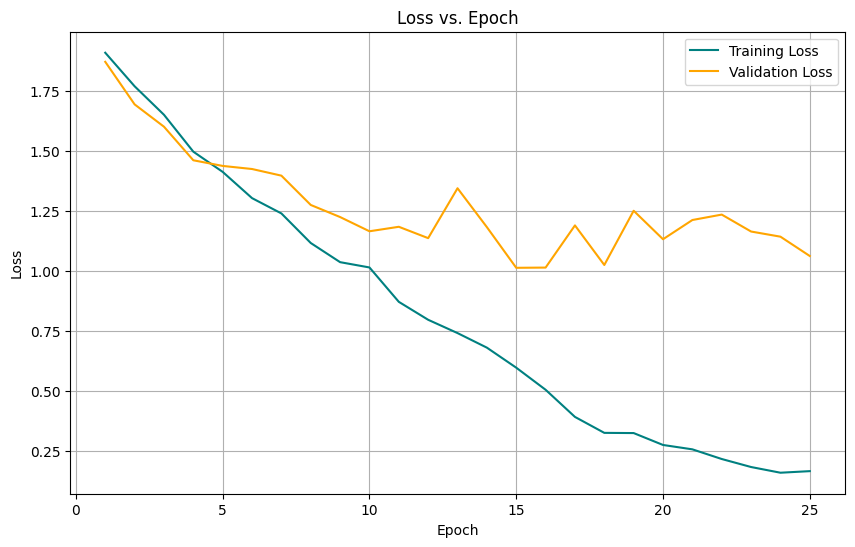

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(full_loss)+1), full_loss, label='Training Loss', color='teal')
plt.plot(range(1, len(full_val_loss)+1), full_val_loss, label='Validation Loss', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.legend()
plt.grid(True)
plt.show()

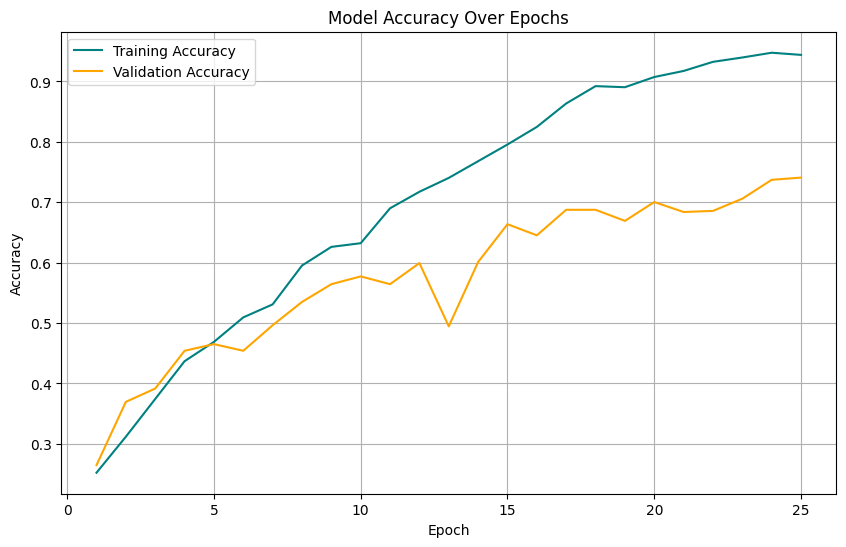

In [16]:
import matplotlib.pyplot as plt

epochs = range(1, len(full_acc) + 1)

# Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, full_acc, label='Training Accuracy', color='teal')
plt.plot(epochs, full_val_acc, label='Validation Accuracy', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
new_model = load_model('/content/drive/MyDrive/New Data/model_epoch25_2025-04-14_02-16-46.h5')

In [7]:
#Plotting loss
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>

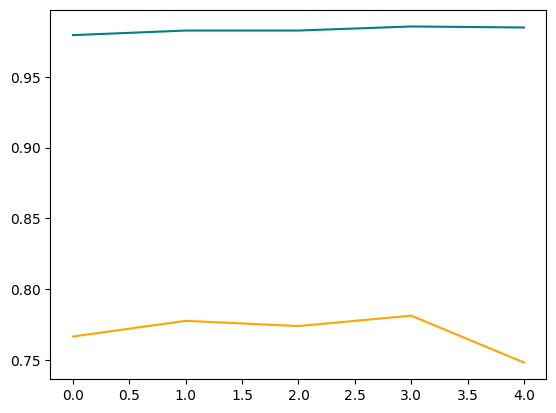

In [ ]:
#plot accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()  # Use CategoricalAccuracy for multi-class

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = new_model.predict(X)

    # Convert y to one-hot encoding for CategoricalAccuracy
    y = tf.keras.utils.to_categorical(y, num_classes=8)

    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Accuracy:", acc.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Precision: 0.6880734
Recall: 0.63920456
Accuracy: 0.6448864


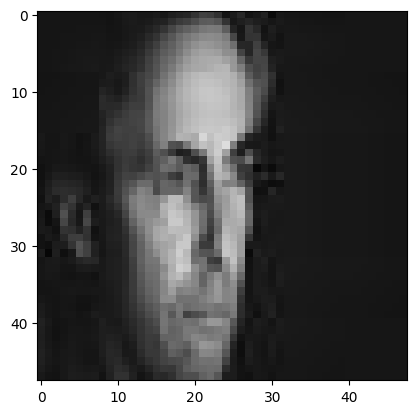

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[2.1755699e-02 3.2303942e-05 1.7809242e-04 5.7618339e-03 1.1631999e-03
  1.5536498e-03 9.6703523e-01 2.5200276e-03]]
Sadness


In [ ]:
#testing pipeline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imghdr
test_img = cv2.imread('/content/drive/MyDrive/AI Project Data/sadness/621462.jpg')
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.show()

test_img = cv2.resize(test_img, (256,256))
test_img = test_img/255.0
test_img = np.expand_dims(test_img, 0)
test_predicton = model.predict(test_img)

print(test_predicton)
if np.argmax(test_predicton) == 0:
  print('Anger')
elif np.argmax(test_predicton) == 1:
  print('Contempt')
elif np.argmax(test_predicton) == 2:
  print('Disgust')
elif np.argmax(test_predicton) == 3:
  print('Fear')
elif np.argmax(test_predicton) == 4:
  print('Happy')
elif np.argmax(test_predicton) == 5:
  print('Neutral')
elif np.argmax(test_predicton) == 6:
  print('Sadness')
elif np.argmax(test_predicton) == 7:
  print('Surprise')